# Defining a Hash Function for Locality-Sensitive Hashing

Given:
1. two $d$-dimensional vectors $p$ and $q$, 
2. their midpoint-vector $m = 0.5 (p + q)$, 
3. a vector $v$ which lies spatially between $p$ and $m$ (see plot below), 
4. and a vector $w$ which lies between $q$ and $m$ (see plot below).

Define:
1. Hash function $h(u, p, q)$ abbreviated $h(u)$, where $u$ is a $d$-dimensional vector, such that $h(u) \in \{0, 1\}$, $h(p) = h(v)$, $h(q) = h(w)$, and $h(v) \neq h(w)$.

Note:
1. For simplicity assume $d$ = 2.
2. The vectors $p$ and $q$ represent the pairs of vectors which are used to define multiple hash functions for an LSH model. The vectors $v$ and $w$ represent vectors which will be hashed after defining the LSH model. To make things concrete, I pick values for $p, q, v, w$.

### 1. Plot the given vectors

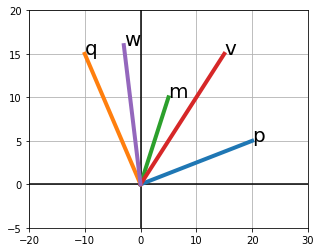

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plt_vec(v, s):
    plt.plot((0, v[0]), (0, v[1]), label=s, lw=4)
    plt.text(s=s, *v, size=20)

p = np.array([20, 5])
q = np.array([-10, 15])
v = np.array([15, 15])
w = np.array([-3, 16])
m = 0.5 * (p + q)

plt.figure(figsize=(5, 4))
plt.axvline(0, c='k')
plt.axhline(0, c='k')
plt_vec(p, "p")
plt_vec(q, "q")
plt_vec(m, "m")
plt_vec(v, "v")
plt_vec(w, "w")
plt.xlim(-20, 30)
plt.ylim(-5, 20)
plt.grid(True)
plt.show()

## 2. Define and compute the normal vector $n$

Find the normal vector $n$, such that $n \cdot m = 0$.

This can be done by setting $n = (n_0, n_1) = (1, n_1)$, then solving for $n_1$ in $n \cdot m = 1\cdot m_0 + n_1m_1 = 0$.

n = [ 1.  -0.5]


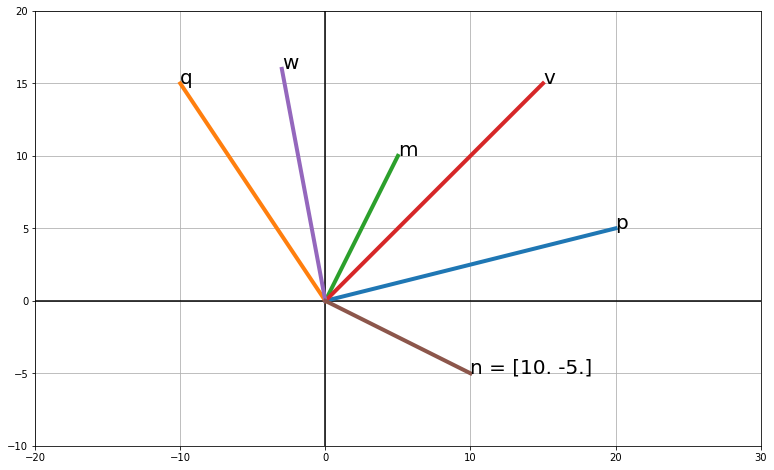

In [6]:
# Solve for n.
n = np.ones_like(m)
n[-1] = -1 * n[:-1].dot(m[:-1]) / m[-1]
print("n = %s" % str(n))

# Amplify n for plotting, although this isn't strictly necessary.
n *= 10

plt.figure(figsize=(13, 8))
plt.axvline(0, c='k')
plt.axhline(0, c='k')
plt_vec(p, "p")
plt_vec(q, "q")
plt_vec(m, "m")
plt_vec(v, "v")
plt_vec(w, "w")
plt_vec(n, "n = %s" % str(n))
plt.xlim(-20, 30)
plt.ylim(-10, 20)
plt.grid(True)
plt.show()

## 3. Use $n$ to describe the position of $v$ and $w$ relative $m$.

Since $n \cdot m = 0$, and $v$ and $w$ are on opposite sides of $m$, perhaps $n \cdot v$ and $n \cdot w$ reveal some information about the position of $v$ and $w$ relative $m$?

Specifically, a vector "above" $m$ should have a different sign than a vector "below" $m$.

Notice below that $\text{sign}(n \cdot q) = \text{sign}(n \cdot w)$ and $\text{sign}(n \cdot p) = \text{sign}(n \cdot v)$

In [3]:
print("n • q = %.2lf" % n.dot(q))
print("n • w = %.2lf" % n.dot(w))
print("n • p = %.2lf" % n.dot(p))
print("n • v = %.2lf" % n.dot(v))

n • q = -175.00
n • w = -110.00
n • p = 175.00
n • v = 75.00


## 4. Define the hash function $h$ in terms of $n$.

For any vector $u$, $h(u, n) = 1[n \cdot u >= 0]$

The notation $1[\text{statement}]$ above denotes that the function will return 1 if the statement is true, and 0 if its false.

Notice that $h$ evaluated on $q, w, p, v$ satisfies the original requirements.

In [4]:
def make_hash_func(p, q):
    m = 0.5 * (p + q)
    n = np.ones_like(m)
    n[-1] = -1 * n[:-1].dot(m[:-1]) / m[-1]
    return lambda u: int(n.dot(u) >= 0)

h = make_hash_func(p, q)
print("h(q) = %d" % h(q))
print("h(w) = %d" % h(w))
print("h(p) = %d" % h(p))
print("h(v) = %d" % h(v))

h(q) = 0
h(w) = 0
h(p) = 1
h(v) = 1


## 5. Tricks for hash function efficiency

Note 2 potential tricks to speed up the hash function and minimize the size of the parameters that need to be stored to define an LSH model.

1. Since the first $d - 1$ values of $n$ are all 1's, you can get an equivalent hash function by summing up the first $d - 1$ values of $u$ and adding the last value of $n$ multipled by the last value of $u$. This is unlikely to be faster if operating on a single vector, but could prove to be a meaningful speed up when operating in batch (e.g. executing multiple hashes in a single vectorized operation).
2. Since the first $d - 1$ values of $n$ are all 1's, you only need to store a single scalar to define each hash function.